<a href="https://colab.research.google.com/github/szykry/CVML_HW/blob/feature%2FOrsi/CVML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework



In [0]:
# Update torch, torchvision and numpy
!pip install -U torch torchvision numpy opencv-python

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
     |████████████████████████████████| 28.2MB 148kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [0]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

In [2]:
 #Install homework repositoryproba
 !git clone https://github.com/szykry/CVML_HW.git

Cloning into 'CVML_HW'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 117 (delta 56), reused 48 (delta 14), pack-reused 0
Receiving objects: 100% (117/117), 61.84 MiB | 10.81 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [0]:
# Set root folder
import os
name = "/content/HW/CVML_HW/"
os.chdir(name)
!pwd

FileNotFoundError: ignored

In [0]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

NameError: ignored

# Tradition



In [0]:
# https://docs.opencv.org/4.3.0/d1/d1a/namespacecv_1_1cuda.html

# Tábla -> hough
# szegmentális
# cv.threshold


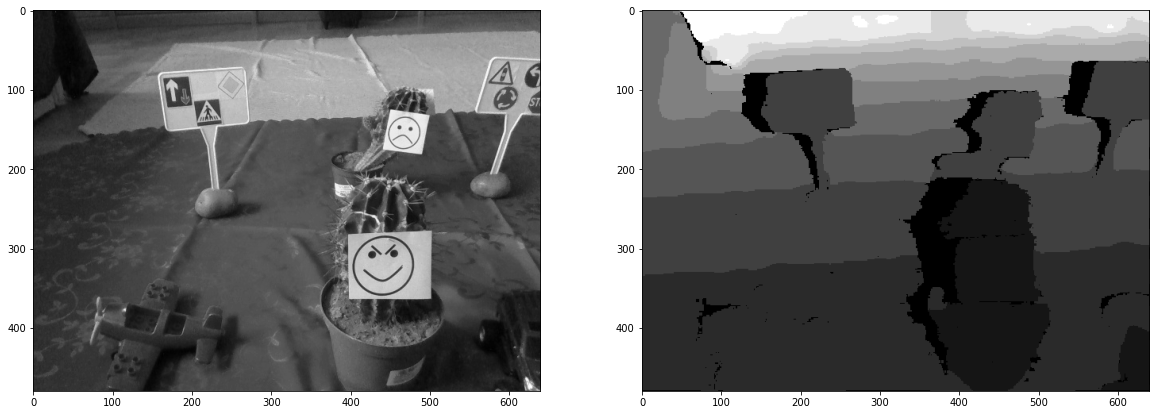

In [6]:
#OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

minVal=0.0
maxVal=0.0

img = cv2.imread("/content/HW/g3/rgb/1.jpg")   # 2.param: RGB, Grayscale, Bináriskép
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(img_gray)    # hol vannak a szélsőértékek
res=img_gray
cv2.convertScaleAbs(img_gray,res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

depth_img = cv2.imread("/content/HW/g3/depth/1.png")
depth_img_gray = cv2.cvtColor(depth_img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(depth_img_gray)    # hol vannak a szélsőértékek
depth_res=depth_img_gray
cv2.convertScaleAbs(depth_img_gray,depth_res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(depth_res,cmap='gray')

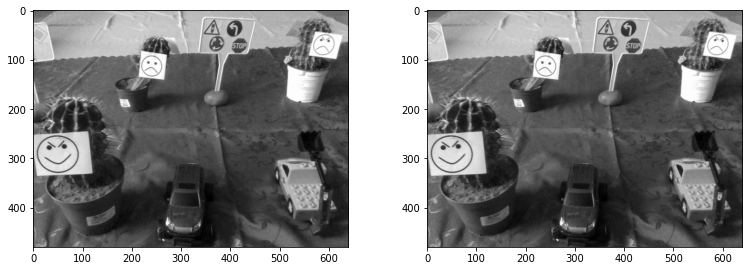

In [0]:

rowSubplot = 4
colSubplot = 3


plt.figure(figsize=(20,20))
imgBGR = cv2.imread("/content/HW/g3/rgb/136.jpg")
grayimg = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
minVal,maxVal,_,_ = cv2.minMaxLoc(grayimg)
plt.subplot(rowSubplot,colSubplot,1)
plt.imshow(grayimg,cmap='gray')
res=grayimg
cv2.convertScaleAbs(grayimg,res,255.0/(maxVal-minVal),-minVal)
plt.subplot(rowSubplot,colSubplot,2)
plt.imshow(res,cmap='gray')

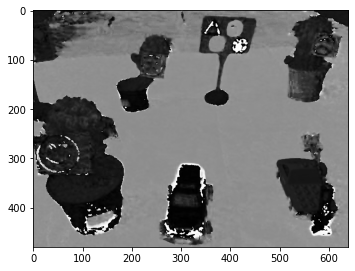

In [0]:
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
saturation_channel = imgHSV[:,:,1]
value_channel = imgHSV[:,:,2]
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,4)
plt.imshow(hue_channel,cmap='gray')



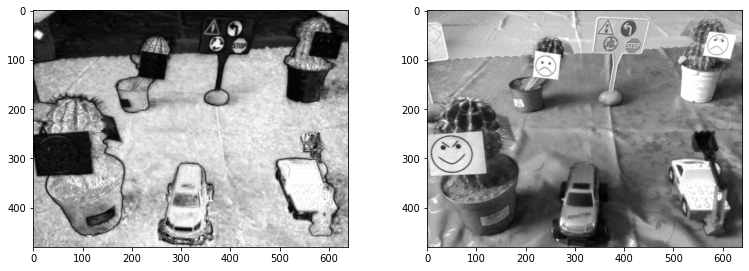

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,5)
plt.imshow(saturation_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,6)
plt.imshow(value_channel,cmap='gray')

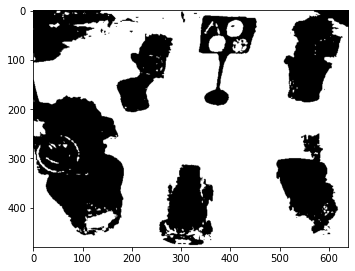

In [0]:
avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,10)
plt.imshow(hue_channel_segment,cmap='gray')

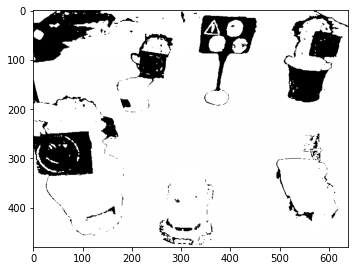

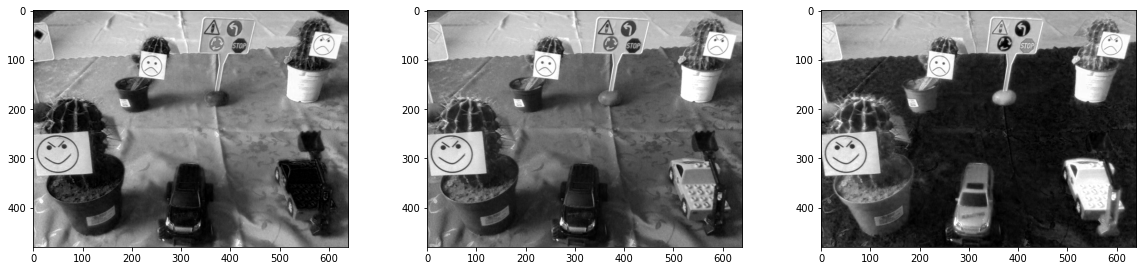

In [0]:
plt.figure(figsize=(20,20))
avg_saturation = np.average(saturation_channel)
saturation_channel_thresh, saturation_channel_segment = cv2.threshold(saturation_channel,(avg_saturation)/2,255,cv2.THRESH_BINARY)
plt.subplot(rowSubplot,colSubplot,11)
plt.imshow(saturation_channel_segment+hue_channel_segment,cmap='gray')

blue_channel = imgBGR[:,:,0]
green_channel = imgBGR[:,:,1]
red_channel = imgBGR[:,:,2]
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,7)
plt.imshow(blue_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,8)
plt.imshow(green_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,9)
plt.imshow(red_channel,cmap='gray')


In [0]:
# Get all subfolders in a directory
import os
path = "/content/HW/g3/rgb"
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
print(myFolderList)

[]


In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1("/content/HW/g4/rgb", "*.jpg"))
print(names)

['1.jpg', '38.jpg', '62.jpg', '78.jpg', '95.jpg', '116.jpg', '134.jpg', '152.jpg', '159.jpg', '190.jpg', '210.jpg', '229.jpg', '250.jpg', '270.jpg', '297.jpg']


In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

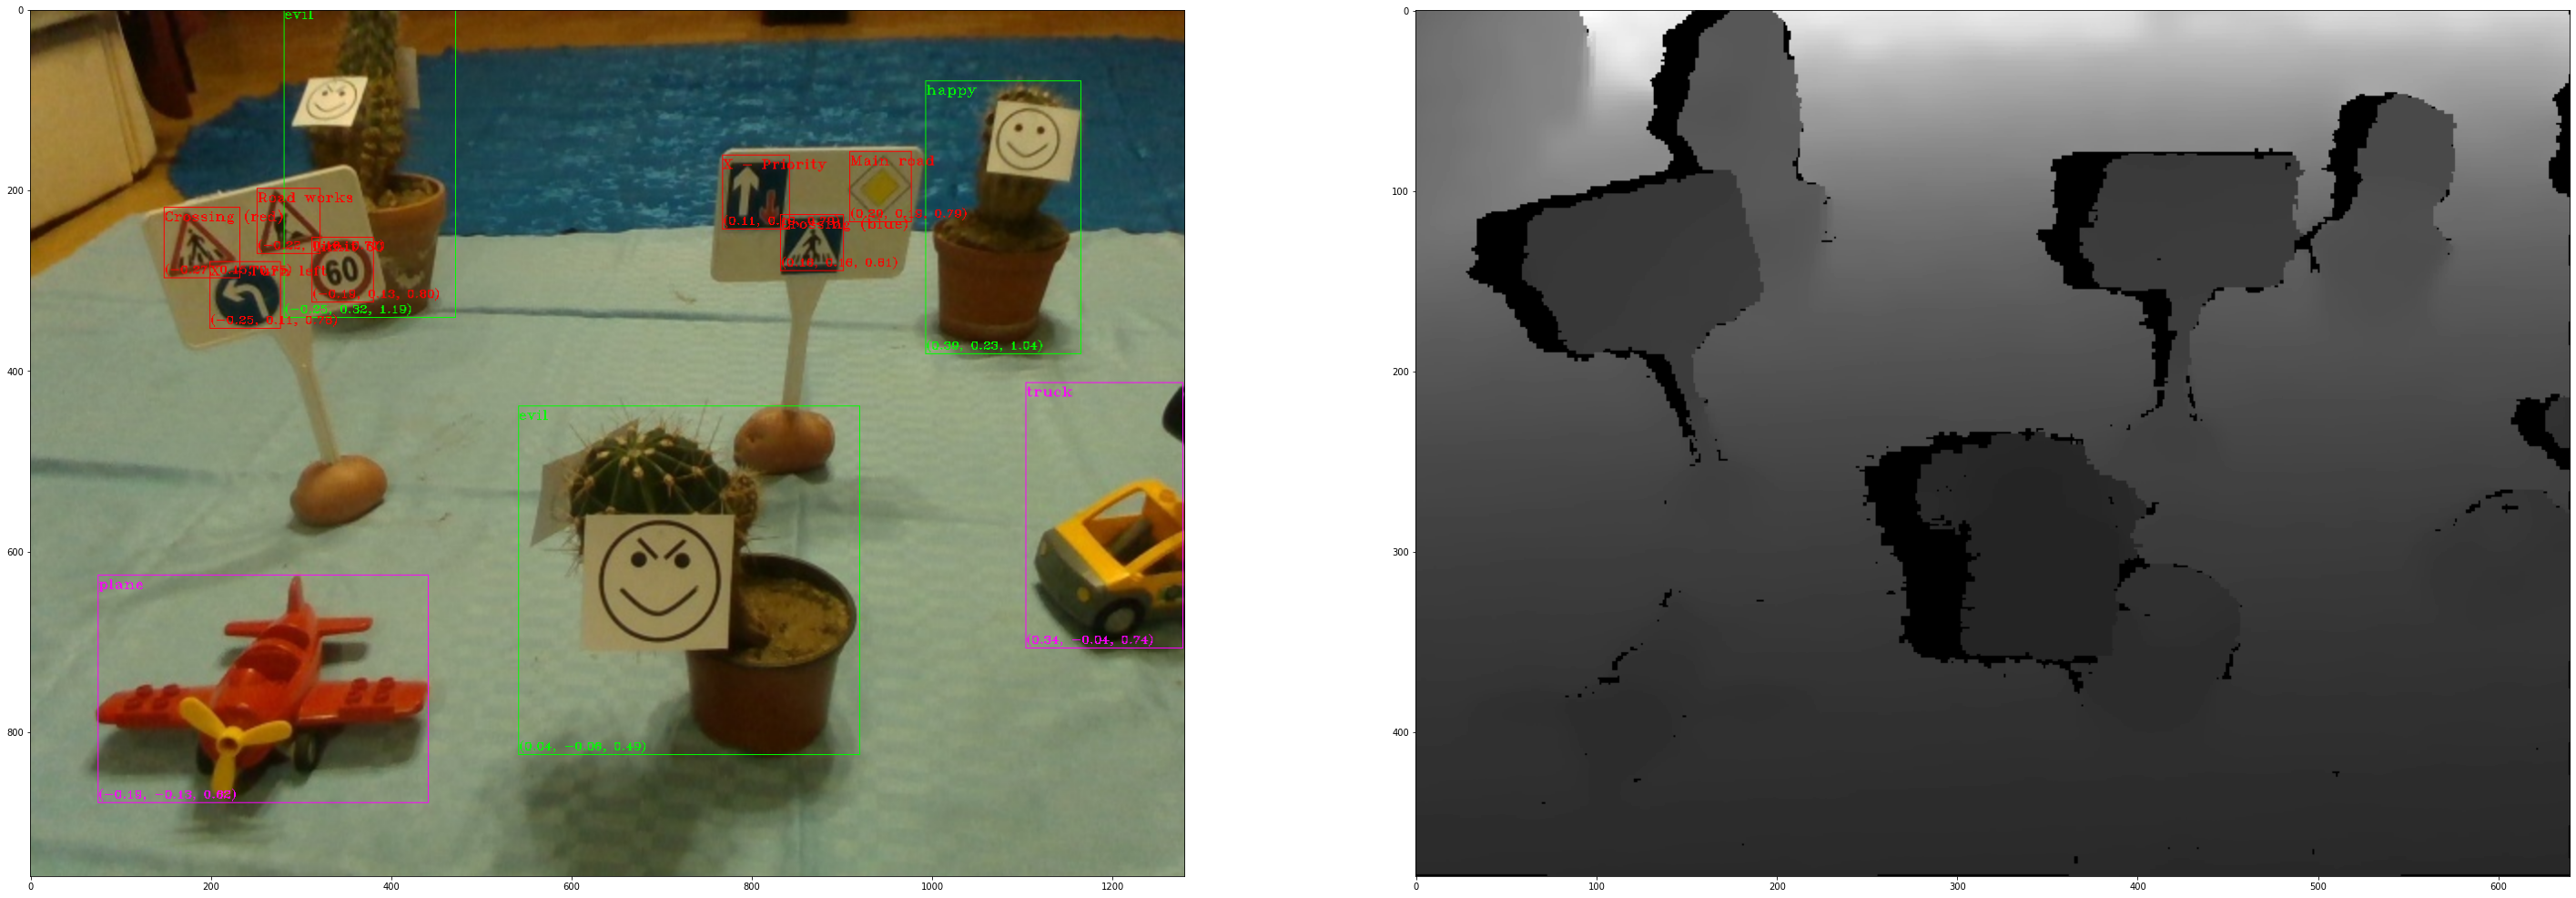

In [0]:
# Display the first images
colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("/content/HW/g1/rgb/1.jpg")
depth = cv2.imread("/content/HW/g1/depth/1.png", -1)

# Read annotations
file = open('/content/HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(50,50))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

<Figure size 1440x1440 with 0 Axes>

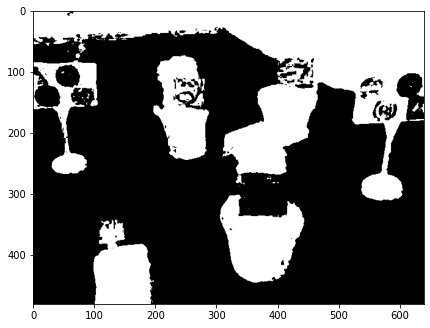

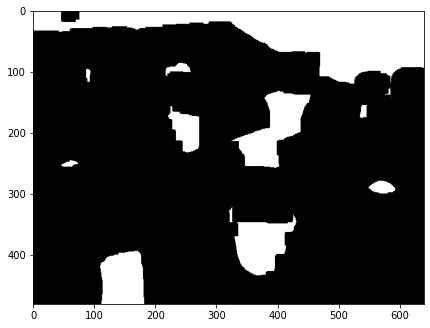

In [0]:
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(20,20))
plt.figure(figsize=(7,7))
plt.imshow(thresh,cmap='gray')

kernel = np.ones((5,5),np.uint8)
# Erosion gives us a binary image that is certainly foreground
sure_fg = cv2.erode(thresh,kernel,iterations=5)

# Erosion gives us a binary image that is certainly background
sure_bg = cv2.dilate(thresh,kernel,iterations=2)

# Uncertain region
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=(7,7))
plt.imshow(sure_fg,cmap='gray')

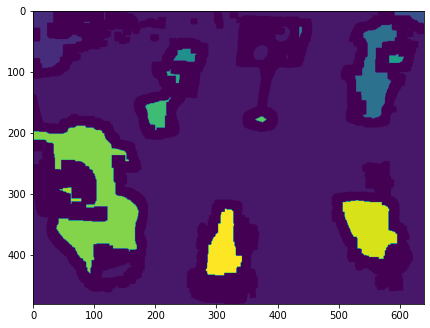

In [0]:

# Label separate foreground pathes
ret, markers = cv2.connectedComponents(sure_fg)
     
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
     
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=(7,7))
plt.imshow(markers)



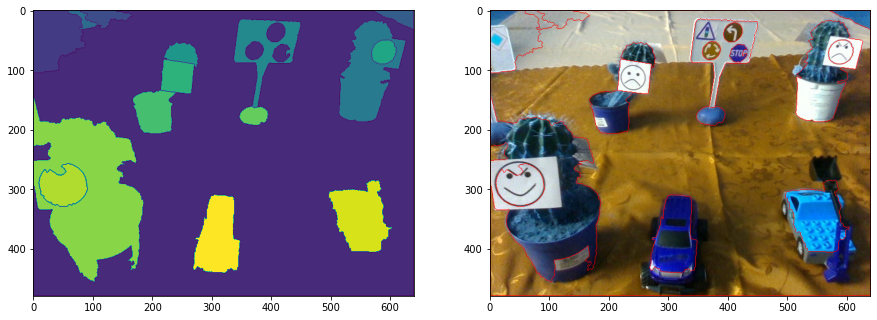

In [0]:

# Runwatershed
markers = cv2.watershed(imgBGR,markers)

# Red out the boundaries
imgBGR[markers == -1] = [255,0,0]

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(markers)
plt.subplot(1,2,2)
plt.imshow(imgBGR)




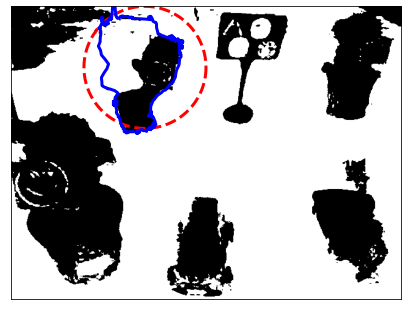

In [0]:
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T
snake = active_contour(gaussian(hue_channel_segment, 3),
                       init, alpha=0.015, beta=10, w_line=-1, w_edge=50, gamma=0.001,
                       coordinates='rc')


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(hue_channel_segment, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, hue_channel_segment.shape[1], hue_channel_segment.shape[0], 0])

plt.show()



In [0]:
imgBGR = cv2.imread("/content/HW/g3/rgb/208.jpg")
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]



img1=cv2.imread('/content/HW/g3/depth/1.png')
blur1 = cv2.GaussianBlur(img1,(5,5),0)
gray1=cv2.cvtColor(blur1,cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray1,65,255,cv2.THRESH_BINARY_INV)

#get foreground
avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
plt.figure(figsize=(7,7))
plt.imshow(hue_channel_segment)

diff=cv2.absdiff(thresh2,thresh1)
diff=cv2.bitwise_xor(diff,thresh1)


kernel = np.ones((1,1),np.uint8)
diff=cv2.erode(diff,kernel,iterations = 10)
diff=cv2.dilate(diff,kernel,iterations = 10)

kernel = np.ones((5,5),np.uint8)
opened = cv2.morphologyEx(diff, cv2.MORPH_OPEN, kernel)
diff = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(7,7))
plt.imshow(diff)

contours, _= cv2.findContours(diff,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w*h < 1600:
      continue
    if w*h > 50000:
      continue
    print(w*h)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(diff, (x, y), (x+w, y+h), (125,125,125), 2)

plt.figure(figsize=(7,7))
plt.imshow(diff)


In [0]:
pimg = cv2.imread("/content/HW/g3/rgb/208.jpg")

imgHSV = cv2.cvtColor(pimg, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
hue_channel_segment = cv2.bitwise_not(hue_channel_segment)


plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,10)
plt.imshow(hue_channel_segment,cmap='gray')
    

In [0]:
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1("/content/HW/g4/rgb", "*.jpg"))
print(names)

#background subtractor
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

root = "/content/HW/g4/rgb/"

images = []
outputs = []

j=0
while(1):
  path = root+names[j+1]
  print(path)
  
  
  images.append(cv2.imread(path)[:,:,2])

  fgmask = fgbg.apply(images[j])
  outputs.append(cv2.cvtColor(fgmask,cv2.COLOR_GRAY2BGR))
  outputs.append(thresh)
  
  j += 1
  if j == 14:
    break

#red_channel = imgBGR[:,:,2]

j=0;
while j < 14:
  plt.figure(figsize=(20,20))
  plt.subplot(rowSubplot,colSubplot,10) 
  plt.imshow(images[j],cmap='gray')

  plt.figure(figsize=(20,20))
  plt.subplot(rowSubplot,colSubplot,10) 
  plt.imshow(outputs[j],cmap='gray')
  j +=1

In [4]:

################################

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
g1 = sorted_nicely(glob.glob1("/content/HW/g1/rgb", "*.jpg"))
g2 = sorted_nicely(glob.glob1("/content/HW/g2/rgb", "*.jpg"))
g3 = sorted_nicely(glob.glob1("/content/HW/g3/rgb", "*.jpg"))
g4 = sorted_nicely(glob.glob1("/content/HW/g4/rgb", "*.jpg"))

def is_contained(match):
  etalon = 25
  (_, maxLoc, r) = match
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  for m in matches:
    if match == m:
      return True
    (_, maxLocM, rM) = m
    (startXM, startYM) = (int(maxLocM[0] * rM), int(maxLocM[1] * rM))
    (endXM, endYM) = (int((maxLocM[0] + tW) * rM), int((maxLocM[1] + tH) * rM))
    if ((abs(startXM - startX) < etalon and abs(endXM-endX) < etalon) or (abs(startYM-startY) < etalon and abs(endYM-endY)<etalon)):
      return True
  
  return False

def is_inThreshold(match):
  etalon = 0.8
  (maxVal, maxLoc, _) = match
  for m in matches:
    (maxValM, maxLocM, _) = m
    if (maxVal  >= etalon*maxValM):
      return True
  
  return False

templates = []
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread('/content/CVML_HW/sadface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
#plt.figure(figsize=(10,10))    
#plt.imshow(template)
templates.append(template)

template = cv2.imread('/content/CVML_HW/angryface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/evilface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/happyface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)


print(templates.count)
root = "/content/HW/g2/rgb/"
# loop over the images to find the template in
for g in g2:
  matches = []
  found = None
  found2 = None
  found3 = None
  found4 = None
  j = -1
  # load the image, convert it to grayscale, and initialize the
  # bookkeeping variable to keep track of the matched region
  #############################
  img = cv2.imread(root+g, 3)
  imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
  hue_channel = imgHSV[:,:,0]
  avg_hue = np.average(hue_channel)
  hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  hue_channel_segment = cv2.bitwise_not(hue_channel_segment)
  ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones((5,5),np.uint8)
  # Erosion gives us a binary image that is certainly foreground
  sure_fg = cv2.erode(thresh,kernel,iterations=5)
  # Erosion gives us a binary image that is certainly background
  sure_bg = cv2.dilate(thresh,kernel,iterations=2)
  # Uncertain region
  unknown = cv2.subtract(sure_bg,sure_fg)
  ret, marker = cv2.connectedComponents(sure_fg)

  #innentől a msolt kód    
  # Add one to all labels so that sure background is not 0, but 1
  marker = marker+1
      
  # Now, mark the region of unknown with zero
  marker[unknown==255] = 0


  # Now we have set the markers, we use the watershed
  # algorithm to generate a marked image
  marked = cv2.watershed(img, marker)

  # Make the background black, and what we want to keep white
  marked[marked == -1] = 255
  marked[marked > 1] = 0

  # Use a kernel to dilate the image, to not lose any detail on the outline
  # I used a kernel of 3x3 pixels
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(marked.astype(np.float32), kernel, iterations = 1)

  # Now apply the mask we created on the initial image
  final_img = cv2.bitwise_and(img, img, mask=dilation.astype(np.uint8))
  plt.figure(figsize=(10,10))
  plt.imshow(final_img)
  # cv2.imread reads the image as BGR, but matplotlib uses RGB
  # BGR to RGB so we can plot the image with accurate colors
  b, g, r = cv2.split(final_img)
  final_img = cv2.merge([r, g, b])
  #############################
  gray = cv2.cvtColor(final_img, cv2.COLOR_BGR2HSV)
  gray = cv2.GaussianBlur(gray,(1,1),0) 
  for temp in templates:
    j += 1
    for scale in np.linspace(0.2, 1.0, 30)[::-1]:
      # resize the image according to the scale, and keep track
      # of the ratio of the resizing
      resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
      r = gray.shape[1] / float(resized.shape[1])
      # if the resized image is smaller than the template, then break
      # from the loop
      if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    # detect edges in the resized, grayscale image and apply template
      # matching to find the template in the image
      edged = cv2.Canny(resized, 70, 300)
      #edged = cv2.bilateralFilter(edged,9,75,75)
      #edged = cv2.bilateralFilter(edged,9,75,75)
      #kernel = np.ones((5,5),np.uint8)
      #edged=cv2.erode(edged,kernel,iterations = 10)
      #edged=cv2.dilate(edged,kernel,iterations = 10)
    
      result = cv2.matchTemplate(edged, temp, cv2.TM_CCOEFF_NORMED)
      (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
      # check to see if the iteration should be visualized
      #if True:
        # draw a bounding box around the detected region
        #clone = np.dstack([edged, edged, edged])
        #cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
        #  (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        #print(maxVal)
      # if we have found a new maximum correlation value, then update
      # the bookkeeping variable
      match = (maxVal, maxLoc, r)
      if (j == 0):
        if (maxVal >= 0.2 and (found is None or maxVal >= found[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found = (maxVal, maxLoc, r)
          if is_contained(found) == False:
            matches.append(found)
      if (j == 1):
        if (maxVal >= 0.2 and (found2 is None or maxVal >= found2[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found2 = (maxVal, maxLoc, r)
          if is_contained(found2) == False:
            matches.append(found2)
      if (j == 2):
        if (maxVal >= 0.2 and (found3 is None or maxVal >= found3[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found3 = (maxVal, maxLoc, r)
          if is_contained(found3) == False:
            matches.append(found3)
      if (j == 3):
        if (maxVal >= 0.2 and (found4 is None or maxVal >= found4[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found4 = (maxVal, maxLoc, r)
          if is_contained(found4) == False:
            matches.append(found4)
      

  # unpack the bookkeeping variable and compute the (x, y) coordinates
  # of the bounding box based on the resized ratio
  for match in matches:
    (_, maxLoc, r) = match
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    # draw a bounding box around the detected result and display the image
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)

  plt.figure(figsize=(10,10))
  plt.imshow(img)

error: ignored

In [5]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
import glob
import re
import matplotlib.pyplot as plt

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
g1 = sorted_nicely(glob.glob1("/content/HW/g1/rgb", "*.jpg"))
g2 = sorted_nicely(glob.glob1("/content/HW/g2/rgb", "*.jpg"))
g3 = sorted_nicely(glob.glob1("/content/HW/g3/rgb", "*.jpg"))
g4 = sorted_nicely(glob.glob1("/content/HW/g4/rgb", "*.jpg"))

def is_contained(match):
  etalon = 25
  (_, maxLoc, r) = match
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  for m in matches:
    if match == m:
      return True
    (_, maxLocM, rM) = m
    (startXM, startYM) = (int(maxLocM[0] * rM), int(maxLocM[1] * rM))
    (endXM, endYM) = (int((maxLocM[0] + tW) * rM), int((maxLocM[1] + tH) * rM))
    if ((abs(startXM - startX) < etalon and abs(endXM-endX) < etalon) or (abs(startYM-startY) < etalon and abs(endYM-endY)<etalon)):
      return True
  
  return False

def is_inThreshold(match):
  etalon = 0.99
  (maxVal, maxLoc, _) = match
  for m in matches:
    (maxValM, maxLocM, _) = m
    if (maxVal  >= etalon*maxValM):
      return True
  
  return False

templates = []
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread('/content/CVML_HW/sadface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
#plt.figure(figsize=(10,10))    
#plt.imshow(template)
templates.append(template)

template = cv2.imread('/content/CVML_HW/angryface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/evilface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/happyface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)


print(templates.count)
root = "/content/HW/g1/rgb/"
# loop over the images to find the template in
for g in g1:
  matches = []
  found = None
  found2 = None
  found3 = None
  found4 = None
  j = -1
  # load the image, convert it to grayscale, and initialize the
  # bookkeeping variable to keep track of the matched region
  image = cv2.imread(root+g)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  gray = cv2.GaussianBlur(gray,(1,1),0) 
  #plt.figure(figsize=(10,10))    
  #plt.imshow(gray) 
  # loop over the scales of the image
  for temp in templates:
    j += 1
    for scale in np.linspace(0.2, 1.0, 30)[::-1]:
      # resize the image according to the scale, and keep track
      # of the ratio of the resizing
      resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
      r = gray.shape[1] / float(resized.shape[1])
      # if the resized image is smaller than the template, then break
      # from the loop
      if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    # detect edges in the resized, grayscale image and apply template
      # matching to find the template in the image
      edged = cv2.Canny(resized, 70, 300)
      #edged = cv2.bilateralFilter(edged,9,75,75)
      #edged = cv2.bilateralFilter(edged,9,75,75)
      #kernel = np.ones((5,5),np.uint8)
      #edged=cv2.erode(edged,kernel,iterations = 10)
      #edged=cv2.dilate(edged,kernel,iterations = 10)
    
      result = cv2.matchTemplate(edged, temp, cv2.TM_CCOEFF_NORMED)
      (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
      # check to see if the iteration should be visualized
      #if True:
        # draw a bounding box around the detected region
        #clone = np.dstack([edged, edged, edged])
        #cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
        #  (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        #print(maxVal)
      # if we have found a new maximum correlation value, then update
      # the bookkeeping variable
      match = (maxVal, maxLoc, r)
      if (j == 0):
        if (maxVal >= 0.2 and (found is None or maxVal >= found[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found = (maxVal, maxLoc, r)
          if is_contained(found) == False:
            matches.append(found)
      if (j == 1):
        if (maxVal >= 0.2 and (found2 is None or maxVal >= found2[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found2 = (maxVal, maxLoc, r)
          if is_contained(found2) == False:
            matches.append(found2)
      if (j == 2):
        if (maxVal >= 0.2 and (found3 is None or maxVal >= found3[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found3 = (maxVal, maxLoc, r)
          if is_contained(found3) == False:
            matches.append(found3)
      if (j == 3):
        if (maxVal >= 0.2 and (found4 is None or maxVal >= found4[0] or is_inThreshold(match))):
          #plt.figure(figsize=(10,10))    
          #plt.imshow(clone)
          found4 = (maxVal, maxLoc, r)
          if is_contained(found4) == False:
            matches.append(found4)
      

  # unpack the bookkeeping variable and compute the (x, y) coordinates
  # of the bounding box based on the resized ratio
  for match in matches:
    (_, maxLoc, r) = match
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    # draw a bounding box around the detected result and display the image
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

  plt.figure(figsize=(10,10))
  plt.imshow(image)

error: ignored

In [0]:
# Load image and template
mario_rgb = cv2.imread('/content/HW/g3/rgb/208.jpg')
mario_gray = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2GRAY)
mario_canny = cv2.Canny(mario_gray, 50, 300)
template = cv2.imread('/content/CVML_HW/angryface.png',0) #ezt keressük meg a képben majd
template_canny = cv2.Canny(template, 50, 300)
w, h = template.shape[::-1]  #rajzoláshoz kell, a template magassága. Tömb shape visszaadja, hogy hányszor hányas a tömb. "::-1" fordítva menj rajta (mert opencv tömb másmilyen)
   
# Run template matching
res = cv2.matchTemplate(mario_gray, template, cv2.TM_CCOEFF_NORMED) #ccoeff kollerációt számol a template és a kép között, nomralizál: -1 és 1 között lesz

# Get locations where the correlation is larger than the threshold
threshold = 0.4 #ami e fölött van azt fogjuk jónak tekinteni
loc = np.where(res >= threshold) #true és false tömb result méretű, ott true ahol ez a feltétel igaz hogy >=, a where megmondja h mely indexekre igaz ez
print(loc)

# Draw
for pt in zip(*loc[::-1]):
    cv2.rectangle(mario_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
mario_rgb = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(mario_rgb)

In [0]:
img1 = cv2.imread('/content/CVML_HW/sadface.png', 0)        # queryImage
img2 = cv2.imread('/content/HW/g4/rgb/210.jpg', 0) # trainImage
img1 = cv2.Canny(img1, 50, 250)
img2 = cv2.Canny(img2, 50, 250)    
# Initiate ORB detector
orb = cv2.ORB_create()
    
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
img_kp = cv2.drawKeypoints(img2, kp2, 0, color=(0,255,0), flags=0)
plt.imshow(img_kp)

# BFMatcher with default params Note: Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Find the two best matches for every keypoint
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(matching_result)
# Apply ratio test: the the best match is much better 
# than the second best, we keep the match
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
    
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)

In [0]:

cv2.cascade( OpenCV.CASCADE_FRONTALFACE_ALT )

kep = cv2.imread('/content/HW/g4/rgb/210.jpg', 0) # trainImage
faces = cv2.detect();
for f in faces:
  cv2.rectangle(kep, f.x, f.y, f.width, f.height (0, 0, 255), 2)

plt.figure(figsize=(20,20))
plt.imshow(kep)


In [0]:
 import numpy as np
import argparse
import imutils
import glob
import cv2
import glob
import re
 import matplotlib.pyplot as plt

img = cv2.imread("/content/HW/g1/rgb/145.jpg", 3)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
hue_channel_segment = cv2.bitwise_not(hue_channel_segment)
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
# Load image and template
mario_rgb = cv2.imread('/content/HW/g1/rgb/145.jpg')
mario_gray = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/CVML_HW/cactiwhite.png',0)
w, h = template.shape[::-1]
found = None

for scale in np.linspace(0.2, 1.0, 20)[::-1]:
  resized = imutils.resize(mario_gray, width = int(mario_gray.shape[1] * scale))
  r = mario_gray.shape[1] / float(resized.shape[1])
  edged = cv2.Canny(resized, 50, 200)
  result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF_NORMED)
  threshold = 0.35 #ami e fölött van azt fogjuk jónak tekinteni
  loc = np.where(result >= threshold) #true és false tömb result méretű, ott true ahol ez a feltétel igaz hogy >=, a where megmondja h mely indexekre igaz ez
  print(loc)

  # Draw
  for pt in zip(*loc[::-1]):
      cv2.rectangle(mario_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
 
  (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
  found = (maxVal, maxLoc, r) 
  if resized.shape[0] < h or resized.shape[1] < w: 
            break
  found = (maxVal, maxLoc, r) 

# unpack the found varaible and compute the (x, y) coordinates 
# of the bounding box based on the resized ratio 
#(_, maxLoc, r) = found 
#(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
#(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)) 
  
mario_rgb = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(mario_rgb)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


error: ignored

<built-in method count of list object at 0x7fe166c0d708>
X pozíció:
[332, 574, 199]
END:
[365, 613, 247]
Y pozíció:
[108, 160, 238]
END:
[140, 198, 284]


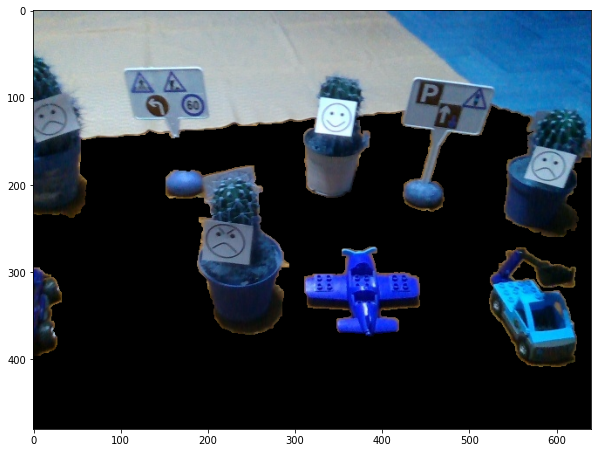

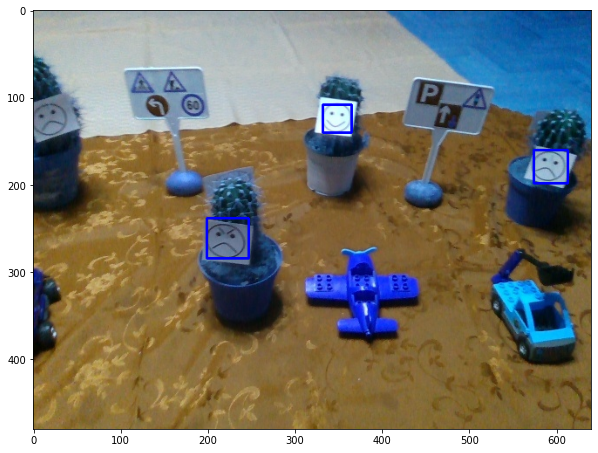

In [8]:
############Egy kép template

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
g1 = sorted_nicely(glob.glob1("/content/HW/g1/rgb", "*.jpg"))
g2 = sorted_nicely(glob.glob1("/content/HW/g2/rgb", "*.jpg"))
g3 = sorted_nicely(glob.glob1("/content/HW/g3/rgb", "*.jpg"))
g4 = sorted_nicely(glob.glob1("/content/HW/g4/rgb", "*.jpg"))

def is_contained(match):
  etalon = 25
  (_, maxLoc, r) = match
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  for m in matches:
    if match == m:
      return True
    (_, maxLocM, rM) = m
    (startXM, startYM) = (int(maxLocM[0] * rM), int(maxLocM[1] * rM))
    (endXM, endYM) = (int((maxLocM[0] + tW) * rM), int((maxLocM[1] + tH) * rM))
    if ((abs(startXM - startX) < etalon and abs(endXM-endX) < etalon) or (abs(startYM-startY) < etalon and abs(endYM-endY)<etalon)):
      return True
  
  return False

def is_inThreshold(match):
  etalon = 0.8
  (maxVal, maxLoc, _) = match
  for m in matches:
    (maxValM, maxLocM, _) = m
    if (maxVal  >= etalon*maxValM):
      return True
  
  return False

templates = []
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread('/content/CVML_HW/sadface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
#plt.figure(figsize=(10,10))    
#plt.imshow(template)
templates.append(template)

template = cv2.imread('/content/CVML_HW/angryface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/evilface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)

template = cv2.imread('/content/CVML_HW/happyface.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[::-1]
templates.append(template)


print(templates.count)
root = "/content/HW/g2/rgb/313"
# loop over the images to find the template in

matches = []
found = None
found2 = None
found3 = None
found4 = None
j = -1
# load the image, convert it to grayscale, and initialize the
# bookkeeping variable to keep track of the matched region
#############################
img = cv2.imread('/content/HW/g2/rgb/415.jpg', 3)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
hue_channel_segment = cv2.bitwise_not(hue_channel_segment)
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((5,5),np.uint8)
# Erosion gives us a binary image that is certainly foreground
sure_fg = cv2.erode(thresh,kernel,iterations=5)
# Erosion gives us a binary image that is certainly background
sure_bg = cv2.dilate(thresh,kernel,iterations=2)
# Uncertain region
unknown = cv2.subtract(sure_bg,sure_fg)
ret, marker = cv2.connectedComponents(sure_fg)

#innentől a msolt kód    
# Add one to all labels so that sure background is not 0, but 1
marker = marker+1
    
# Now, mark the region of unknown with zero
marker[unknown==255] = 0


# Now we have set the markers, we use the watershed
# algorithm to generate a marked image
marked = cv2.watershed(img, marker)

# Make the background black, and what we want to keep white
marked[marked == -1] = 255
marked[marked > 1] = 0

# Use a kernel to dilate the image, to not lose any detail on the outline
# I used a kernel of 3x3 pixels
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(marked.astype(np.float32), kernel, iterations = 1)

# Now apply the mask we created on the initial image
final_img = cv2.bitwise_and(img, img, mask=dilation.astype(np.uint8))
plt.figure(figsize=(10,10))
plt.imshow(final_img)
# cv2.imread reads the image as BGR, but matplotlib uses RGB
# BGR to RGB so we can plot the image with accurate colors
b, g, r = cv2.split(final_img)
final_img = cv2.merge([r, g, b])
#############################
gray = cv2.cvtColor(final_img, cv2.COLOR_BGR2HSV)
gray = cv2.GaussianBlur(gray,(1,1),0) 
for temp in templates:
  j += 1
  for scale in np.linspace(0.2, 1.0, 30)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])
    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
      break
  # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 70, 300)
    #edged = cv2.bilateralFilter(edged,9,75,75)
    #edged = cv2.bilateralFilter(edged,9,75,75)
    #kernel = np.ones((5,5),np.uint8)
    #edged=cv2.erode(edged,kernel,iterations = 10)
    #edged=cv2.dilate(edged,kernel,iterations = 10)
  
    result = cv2.matchTemplate(edged, temp, cv2.TM_CCOEFF_NORMED)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    # check to see if the iteration should be visualized
    #if True:
      # draw a bounding box around the detected region
      #clone = np.dstack([edged, edged, edged])
      #cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
      #  (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
      #plt.figure(figsize=(10,10))    
      #plt.imshow(clone)
      #print(maxVal)
    # if we have found a new maximum correlation value, then update
    # the bookkeeping variable
    match = (maxVal, maxLoc, r)
    if (j == 0):
      if (maxVal >= 0.2 and (found is None or maxVal >= found[0] or is_inThreshold(match))):
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        found = (maxVal, maxLoc, r)
        if is_contained(found) == False:
          matches.append(found)
    if (j == 1):
      if (maxVal >= 0.2 and (found2 is None or maxVal >= found2[0] or is_inThreshold(match))):
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        found2 = (maxVal, maxLoc, r)
        if is_contained(found2) == False:
          matches.append(found2)
    if (j == 2):
      if (maxVal >= 0.2 and (found3 is None or maxVal >= found3[0] or is_inThreshold(match))):
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        found3 = (maxVal, maxLoc, r)
        if is_contained(found3) == False:
          matches.append(found3)
    if (j == 3):
      if (maxVal >= 0.2 and (found4 is None or maxVal >= found4[0] or is_inThreshold(match))):
        #plt.figure(figsize=(10,10))    
        #plt.imshow(clone)
        found4 = (maxVal, maxLoc, r)
        if is_contained(found4) == False:
          matches.append(found4)
    
xstart = []
xend = []
ystart = []
yend = []
# unpack the bookkeeping variable and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
for match in matches:
  (_, maxLoc, r) = match
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  xstart.append(startX)
  xend.append(endX)
  ystart.append(startY)
  yend.append(endY)
  # draw a bounding box around the detected result and display the image
  cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)

plt.figure(figsize=(10,10))
plt.imshow(img)

print("X pozíció:")
print(xstart)
print("END:")
print(xend)
print("Y pozíció:")
print(ystart)
print("END:")
print(yend)

In [14]:
#kameramátrixos számolás után:
#u - "2D x pozíció" v - "2D y pozíció" z = "depth fájl paraméter"
#többi paraméter
u = (xstart[0]+xend[0])/2;
v = (ystart[0]+yend[0])/2;
#depth fájlból z kinyerése:
img = cv2.imread('/content/HW/g2/depth/415.jpg', 3);
z = img[u,v];
x = (u-3.144262695300000*z)/6.060482177699999;
y = (v-2.460503845200000*z)/6.049857788;

TypeError: ignored

In [10]:

CL = np.array([[533.00375595 ,  0. , 341.87679201],[  0.  ,533.02410518 , 234.64224344],[  0.  , 0. ,  1  ]])
print(CL)
#BL = np.ndarray([[533.00375595 ,  0. , 341.87679201],[  0.  ,533.02410518 , 234.64224344],[  0.  , 0. ,  1  ]], np.int32)
#print(BL)
distL = np.array([[0.],[0.],[0.], [0.], [0.]])
print(distL)

Q = np.array([[ 1.00000000e+00 , 0.00000000e+00 , 0.00000000e+00 ,-3.38343929e+02],
 [ 0.00000000e+00 , 1.00000000e+00,  0.00000000e+00 ,-2.44026165e+02],
 [ 0.00000000e+00 , 0.00000000e+00,  0.00000000e+00 , 5.34772913e+02],
 [ 0.00000000e+00 , 0.00000000e+00 , 3.00698553e-01, -0.00000000e+00]])
print(Q)


AL = np.array([[ 6.0604821777343750e+02, 0., 3.1442626953125000e+02, 0., 6.0498577880859375e+02, 2.4605038452148438e+02, 0., 0., 1. ]])
print(AL)

imgpoint = np.array([[(xstart[0]+xend[0])/2, (ystart[0]+yend[0])/2], [(xstart[1]+xend[1])/2, (ystart[1]+yend[1])/2 ],[(xstart[2]+xend[2])/2, (ystart[2]+yend[2])/2 ]])
print(imgpoint)

[[533.00375595   0.         341.87679201]
 [  0.         533.02410518 234.64224344]
 [  0.           0.           1.        ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -3.38343929e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -2.44026165e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.34772913e+02]
 [ 0.00000000e+00  0.00000000e+00  3.00698553e-01 -0.00000000e+00]]
[[606.04821777   0.         314.42626953   0.         604.98577881
  246.05038452   0.           0.           1.        ]]
[[348.5 124. ]
 [593.5 179. ]
 [223.  261. ]]


In [0]:
###3D Vision
##Q számolása

#kamera matrix, distortion, kepmeret calibration.yamlből olvasva
AL = np.array([[ 6.0604821777343750e+02, 0., 3.1442626953125000e+02, 0., 6.0498577880859375e+02, 2.4605038452148438e+02, 0., 0., 1. ]])
distL = np.array([[0.],[0.],[0.], [0.], [0.]])
w = 640
h = 480
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
objpoints = []#objp belepakolva sokszor
objpoints.append(objp)
imgpointsL = []
imgpoint = np.array([[(xstart[0]+xend[0])/2, (ystart[0]+yend[0])/2], [(xstart[1]+xend[1])/2, (ystart[1]+yend[1])/2 ],[(xstart[2]+xend[2])/2, (ystart[2]+yend[2])/2 ]])#bounding box közepe
imgpointsL.append(imgpoint)
imgpointsR = imgpointsL
retS,_,_,_,_,R,T,E,F = cv2.stereoCalibrate(objpoints, imgpointsL, imgpointsR, AL, distL, AL, distL, (w,h))

RL,RR,PL,PR,Q,_,_ = cv2.stereoRectify(AL,distL,AL,distL,(w,h),R,T)

# Read stereo pair
imgL = cv2.imread('/content/HW/g1/rgb/145.jpg',0)
imgR = cv2.imread('/content/HW/g1/rgb/159.jpg',0)

# Create BM and SGBM algorithms
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=7)
stereo2 = cv2.StereoSGBM_create(numDisparities=16, blockSize=7,P1=100,P2=300)

# Compute disparities
disparity = stereo.compute(imgL,imgR)
disparity2 = stereo2.compute(imgL,imgR)

# Plot
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(imgL,'gray')
plt.subplot(1,3,2)
plt.imshow(disparity,'gray')
plt.subplot(1,3,3)
plt.imshow(disparity2,'gray')

# Reproject
xyz = cv2.reprojectImageTo3D(disparity2,Q,handleMissingValues=True)

# Get X,Y,Z coordinates
xdata = xyz[...,0]
ydata = xyz[...,1]
zdata = xyz[...,2]

# Clean Outliers
xdata[zdata > 50] = 0
ydata[zdata > 50] = 0
zdata[zdata > 50] = 0

# 3D plotting
fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(disparity2,'gray')
plt.subplot(2,2,2)
plt.imshow(xdata,'gray')
plt.subplot(2,2,3)
plt.imshow(ydata,'gray')
plt.subplot(2,2,4)
plt.imshow(zdata,'gray')

error: ignored

In [0]:
#copy informations from calibration.yaml file
camera_matrix = [ 6.0604821777343750e+02, 0., 3.1442626953125000e+02, 0., 6.0498577880859375e+02, 2.4605038452148438e+02, 0., 0., 1. ]
dist_coef = [ 0., 0., 0., 0., 0. ]
img = cv2.imread('/content/HW/g1/rgb/145.jpg')

[[-8 -8 -8 ... -8 -9 -9]
 [-7 -7 -7 ... -8 -9 -9]
 [-7 -7 -7 ... -8 -8 -8]
 ...
 [-2 -2 -2 ... -2 -2  0]
 [-2 -2 -2 ... -2 -2  0]
 [ 0  0  0 ...  0  0  0]]


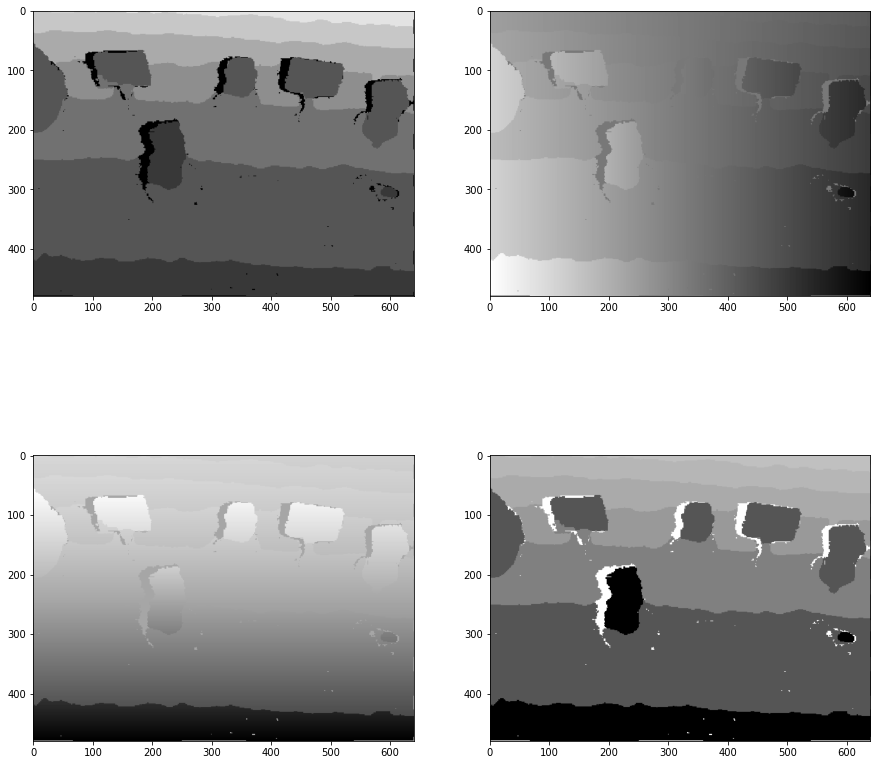

In [0]:
#előző kép bounding box közepek
imgpoint = np.array([[(xstart[0]+xend[0])/2, (ystart[0]+yend[0])/2], [(xstart[1]+xend[1])/2, (ystart[1]+yend[1])/2 ],[(xstart[2]+xend[2])/2, (ystart[2]+yend[2])/2 ]])#bounding box közepe


Q = np.array([[ 1.00000000e+00 , 0.00000000e+00 , 0.00000000e+00 ,-3.38343929e+02],
 [ 0.00000000e+00 , 1.00000000e+00,  0.00000000e+00 ,-2.44026165e+02],
 [ 0.00000000e+00 , 0.00000000e+00,  0.00000000e+00 , 5.34772913e+02],
 [ 0.00000000e+00 , 0.00000000e+00 , 3.00698553e-01, -0.00000000e+00]])
# Reproject
disparity2 = cv2.imread('/content/HW/g2/depth/415.png',0)
disparity = -1*disparity2
xyz = cv2.reprojectImageTo3D(disparity,Q,handleMissingValues=True)

# Get X,Y,Z coordinates
xdata = xyz[...,0]
ydata = xyz[...,1]
zdata = xyz[...,2]

# Clean Outliers
xdata[zdata > 50] = 0
ydata[zdata > 50] = 0
zdata[zdata > 50] = 0

# 3D plotting
fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(disparity2,'gray')
plt.subplot(2,2,2)
plt.imshow(xdata,'gray')
plt.subplot(2,2,3)
plt.imshow(ydata,'gray')
plt.subplot(2,2,4)
plt.imshow(zdata,'gray')

print(disparity)